In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



: 

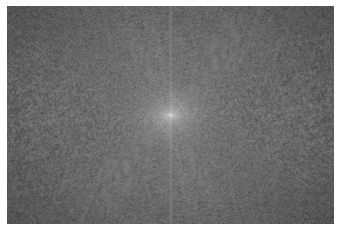

In [141]:
# read image 
img = cv2.imread('/input1.jpeg',0)
# calculate fourierr transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.axis('off')
plt.imshow(np.log1p(np.abs(img_fft)),cmap='gray')

# **Lowpass filter**

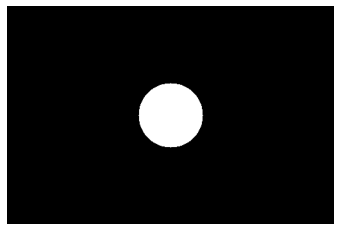

In [142]:
# low pass filter
# lowPass_filter(rows_counter,columns_counter) = 1 if (D<=D0) , = 0 if  (D>D0)
# D = ( (rows_counter - rows/2)^2 + ( columns_counter - columns/2)^2 )^(1/2)
rows,columns = img.shape
lowPass_filter = np.zeros((rows,columns), dtype=np.float32)
D0=50

for rows_counter in range(rows):
  for columns_counter in range(columns):
    D = np.sqrt((rows_counter-rows/2)**2 + (columns_counter-columns/2)**2)
    if D <= D0:
      lowPass_filter[rows_counter,columns_counter] = 1
    else:
      lowPass_filter[rows_counter,columns_counter] = 0

plt.imshow(lowPass_filter, cmap='gray')
plt.axis('off')
plt.show()
# white represent 1 , black represent 0 



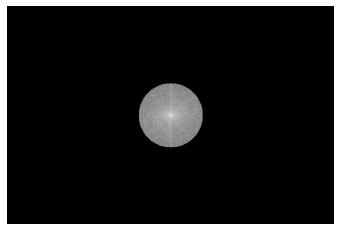

In [143]:
# apply low pass on the freq domain
filtered_img_freq = lowPass_filter * img_fft
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img_freq)),cmap='gray')

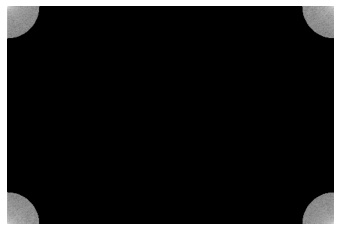

In [144]:
# return the low freq back to the corner of the image 
filtered_img_freq_corner = np.fft.fftshift(filtered_img_freq)
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img_freq_corner)),cmap='gray')

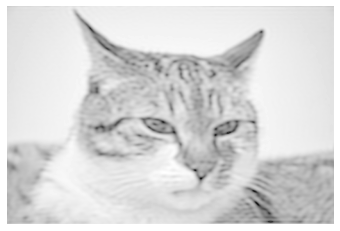

In [145]:
# reconstruc the image
filtered_img = np.abs(np.fft.ifft2(filtered_img_freq_corner))
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img)),cmap='gray')

In [146]:
def fourier_transform(img):
  img_fft = np.fft.fftshift(np.fft.fft2(img))
  return img_fft

In [147]:
# lowpass final function 
def apply_lowPass_filter(img):
  # low pass filter
  # lowPass_filter(rows_counter,columns_counter) = 1 if (D<=D0) , = 0 if  (D>D0)
  # D = ( (rows_counter - rows/2)^2 + ( columns_counter - columns/2)^2 )^(1/2)
  img_fft=fourier_transform(img)
  rows,columns = img.shape
  lowPass_filter = np.zeros((rows,columns), dtype=np.float32)
  D0=10 #how much blured 10 -> more blur (can be in ui as imput or slider)

  for rows_counter in range(rows):
    for columns_counter in range(columns):
      D = np.sqrt((rows_counter-rows/2)**2 + (columns_counter-columns/2)**2)
      if D <= D0:
        lowPass_filter[rows_counter,columns_counter] = 1
      else:
        lowPass_filter[rows_counter,columns_counter] = 0
    
    # apply low pass on the freq domain
  filtered_img_freq = lowPass_filter * img_fft
  # return the low freq back to the corner of the image 
  filtered_img_freq_corner = np.fft.fftshift(filtered_img_freq)
  filtered_img = np.abs(np.fft.ifft2(filtered_img_freq_corner))
  plt.axis('off')
  plt.imshow(np.log1p(np.abs(filtered_img)),cmap='gray')
  return filtered_img_freq,lowPass_filter



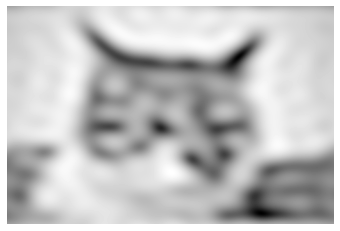

In [148]:
low,low_matrex=apply_lowPass_filter(img)

# **Highpass filter**

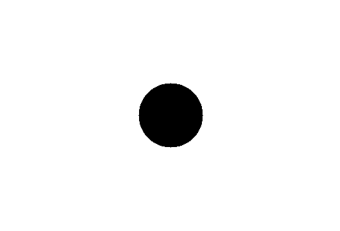

In [149]:
highpass_filter = 1-lowPass_filter
plt.imshow(highpass_filter, cmap='gray')
plt.axis('off')
plt.show()

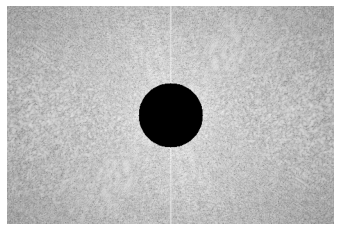

In [150]:
# apply low pass on the freq domain
filtered_img_freq = highpass_filter * img_fft
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img_freq)),cmap='gray')

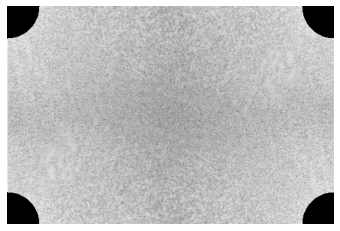

In [151]:
# return the low freq back to the corner of the image 
filtered_img_freq_corner = np.fft.fftshift(filtered_img_freq)
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img_freq_corner)),cmap='gray')

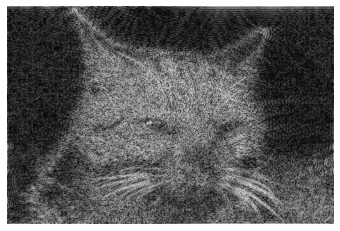

In [152]:
filtered_img = np.abs(np.fft.ifft2(filtered_img_freq_corner))
plt.axis('off')
plt.imshow(np.log1p(np.abs(filtered_img)),cmap='gray')

In [153]:
# final func of highpass 
def apply_highpass_filter(img):
  lowpassimg,lowpass = apply_lowPass_filter(img)
  highpass_filter = 1 - lowpass
  filtered_img_freq = highpass_filter * img_fft
  filtered_img_freq_corner = np.fft.fftshift(filtered_img_freq)
  filtered_img = np.abs(np.fft.ifft2(filtered_img_freq_corner))
  plt.axis('off')
  plt.imshow(np.log1p(np.abs(filtered_img)),cmap='gray')
  return filtered_img_freq



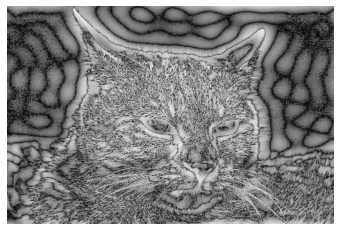

In [154]:
highpass=apply_highpass_filter(img)

Hybrid filter

In [171]:
img1 = cv2.imread('/input1.jpeg', 0)
img2 = cv2.imread('/original1.jpeg', 0)

def gaussian(r2, std=1):
    """
    Sample one instance from gaussian distribution regarding
    given squared-distance:r2, standard-deviation:std and general-constant:k

    :param r: squared distance from center of gaussian distribution
    :param std: standard deviation

    :return: A sampled number obtained from gaussian
    """
    return np.exp(-r2/(2.*std**2)) / (2.*np.pi*std**2)
def make_gaussian(std=1, size=None):
    """
    Creates a gaussian kernel regarding given size and std.
    Note that to define interval with respect to the size,
    I used linear space sampling which may has
    lower accuracy from renowned libraries.

    :param std: standard deviation value
    :param size: size of the output kernel
    :return: A gaussian kernel with size of (size*size)
    """
    if size is None:
        size = np.floor(6 * std)
        if size % 2 == 0:
            size = size - 1
        else:
            size= size - 2
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    distance = x**2+ y**2
    kernel = gaussian(r2=distance, std=std)
    return kernel / kernel.sum()

def hybrid_filter(img1,img2):
  img1_fft = fourier_transform(img1)
  img2_fft = fourier_transform(img2)
  cutoff_lpf = 50
  cutoff_hpf = 50

  lpf = make_gaussian(cutoff_lpf)
  hpf = lpf.max() - lpf


  lpf = np.pad(lpf, [(img1.shape[0]//2-lpf.shape[0]//2,
                    img1.shape[0]//2-lpf.shape[0]//2 - 1),
                  (img1.shape[1]//2-lpf.shape[1]//2,
                    img1.shape[1]//2-lpf.shape[1]//2 - 1)], mode='constant', constant_values=0)

  hpf = np.pad(hpf, [(img1.shape[0]//2-hpf.shape[0]//2,
                    img1.shape[0]//2-hpf.shape[0]//2 - 1),
                  (img1.shape[1]//2-hpf.shape[1]//2,
                    img1.shape[1]//2-hpf.shape[1]//2 - 1)], mode='constant', constant_values=lpf.max())

  img1_lpf = np.fft.ifft2(np.multiply(img1_fft, lpf))
  img2_hpf = np.fft.ifft2(np.multiply(img2_fft, hpf))


  combined = np.fft.ifft2(np.multiply(img1_fft, lpf) + np.multiply(img2_fft, hpf))
  plt.axis('off')

  plt.imshow(np.abs(combined), cmap='gray')

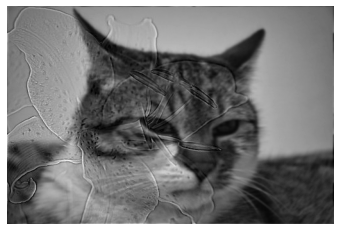

In [172]:
hybrid_filter(img1,img2)